# Live Coding Session: Eine Einführung

https://playground.tensorflow.org/

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

In [1]:
import numpy as np

import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

from plotting import plot_xor_dataset, plot_xor_boundaries, plot_mnist_dataset, plot_mnist_prediction
from prep_mnist import prepare_mnist

## Lösung des XOR Problems

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

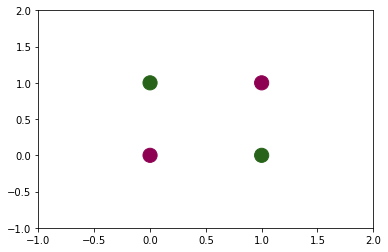

In [3]:
plot_xor_dataset(X,y)

In [4]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X, y, batch_size=16, epochs=1000, verbose=False)

In [5]:
print(model.predict_proba(X))

[[0.01497272]
 [0.9657922 ]
 [0.97102666]
 [0.03853455]]


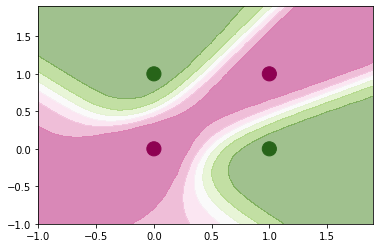

In [6]:
plot_xor_boundaries(X, y, model)

## MNIST dataset: Recognize Handwritten Digits

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape, x_train, x_test, y_train, y_test = prepare_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


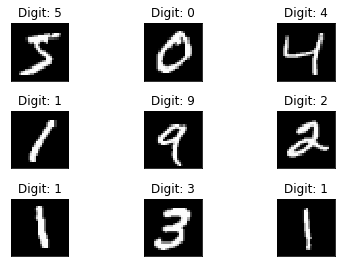

In [8]:
plot_mnist_dataset(x_train, y_train)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])

model.fit(x_train, y_train,
        batch_size=128,
        epochs=10,
        verbose=1,
        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 59s 985us/sample - loss: 2.2708 - accuracy: 0.1720 - val_loss: 2.2278 - val_accuracy: 0.2849
Epoch 2/10
60000/60000 [==============================] - 45s 753us/sample - loss: 2.2023 - accuracy: 0.2695 - val_loss: 2.1407 - val_accuracy: 0.4481 acc - ETA: 31s - loss: 2.2280 - accuracy - ETA: 30s - l
Epoch 3/10
60000/60000 [==============================] - 44s 735us/sample - loss: 2.1119 - accuracy: 0.3604 - val_loss: 2.0231 - val_accuracy: 0.5692
Epoch 4/10
33280/60000 [===============>..............] - ETA: 19s - loss: 2.0224 - accuracy: 0.4313- ETA: 30s  - ETA - ETA: 23s - loss: 2.0295 - accuracy: 0.4

KeyboardInterrupt: 

In [ ]:
plot_mnist_prediction(x_test, y_test, model)